In [71]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import pickle

from matplotlib.patches import Rectangle
import matplotlib.gridspec as gridspec

# Extrapolation, ablation on NK landscapes + GB1 Landscape 
## Extrapolation

In [56]:
#load NK data 
with open('../results/extrapolation_results_NK.pkl', 'rb') as file: 
    extrap_results_NK = pickle.load(file)
#load GB1 data 
with open('../results/extrapolation_results_GB1.pkl', 'rb') as file: 
    extrap_results_GB1 = pickle.load(file) 


In [57]:
pearson_results_NK  = np.zeros((8, 6, 4, 6, 6)) # shape = (n_models, k_vals, replicates, train_distances, test_distances)
pearson_results_GB1 = np.zeros((8, 4, 4, 4))  #shape = (n_models, replicates, train_distances, test_distances)

mse_results_NK  = np.zeros((8, 6, 4, 6, 6)) 
mse_results_GB1 = np.zeros((8, 4, 4, 4))

r2_results_NK = np.zeros((8, 6, 4, 6, 6)) 
r2_results_GB1 = np.zeros((8, 4, 4, 4))

In [58]:
models = ['linear', 'gb', 'rf', 'mlp', 'cnn', 'ulstm', 'blstm', 'transformer']

In [66]:
#load NK data 
for model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(extrap_results_NK[model].keys()):         
        for repl_index, replicate in enumerate(extrap_results_NK[model][k_value].keys()): 
            for train_index, train_distance in enumerate(extrap_results_NK[model][k_value][replicate].keys()):
                for test_index, test_distance in enumerate(list(extrap_results_NK[model][k_value][replicate][train_distance][0].keys())[1:]):
                    pearson_results_NK[model_index][k_index][repl_index][train_index][test_index] = extrap_results_NK[model][k_value][replicate][train_distance][0][test_distance]['pearson_r']
                    mse_results_NK[model_index][k_index][repl_index][train_index][test_index] = extrap_results_NK[model][k_value][replicate][train_distance][0][test_distance]['mse_loss']
                    r2_results_NK[model_index][k_index][repl_index][train_index][test_index] = extrap_results_NK[model][k_value][replicate][train_distance][0][test_distance]['r2']
# load GB1 data
for model_index, model in enumerate(models): 
    for repl_index, replicate in enumerate(extrap_results_GB1[model]['gb1'].keys()): 
        for train_index, train_distance in enumerate(extrap_results_GB1[model]['gb1'][replicate].keys()):
            for test_index, test_distance in enumerate(list(extrap_results_GB1[model]['gb1'][replicate][train_distance][0].keys())[1:]):
                pearson_results_GB1[model_index][repl_index][train_index][test_index] = extrap_results_GB1[model]['gb1'][replicate][train_distance][0][test_distance]['pearson_r']
                mse_results_GB1[model_index][repl_index][train_index][test_index] = extrap_results_GB1[model]['gb1'][replicate][train_distance][0][test_distance]['mse_loss']
                r2_results_GB1[model_index][repl_index][train_index][test_index] = extrap_results_GB1[model]['gb1'][replicate][train_distance][0][test_distance]['r2']
                    

In [85]:
pearson_means_NK  = np.nanmean(pearson_results_NK, axis=2)
pearson_means_GB1 = np.nanmean(pearson_results_GB1, axis=1)

In [86]:
pearson_means_GB1.shape

(8, 4, 4)

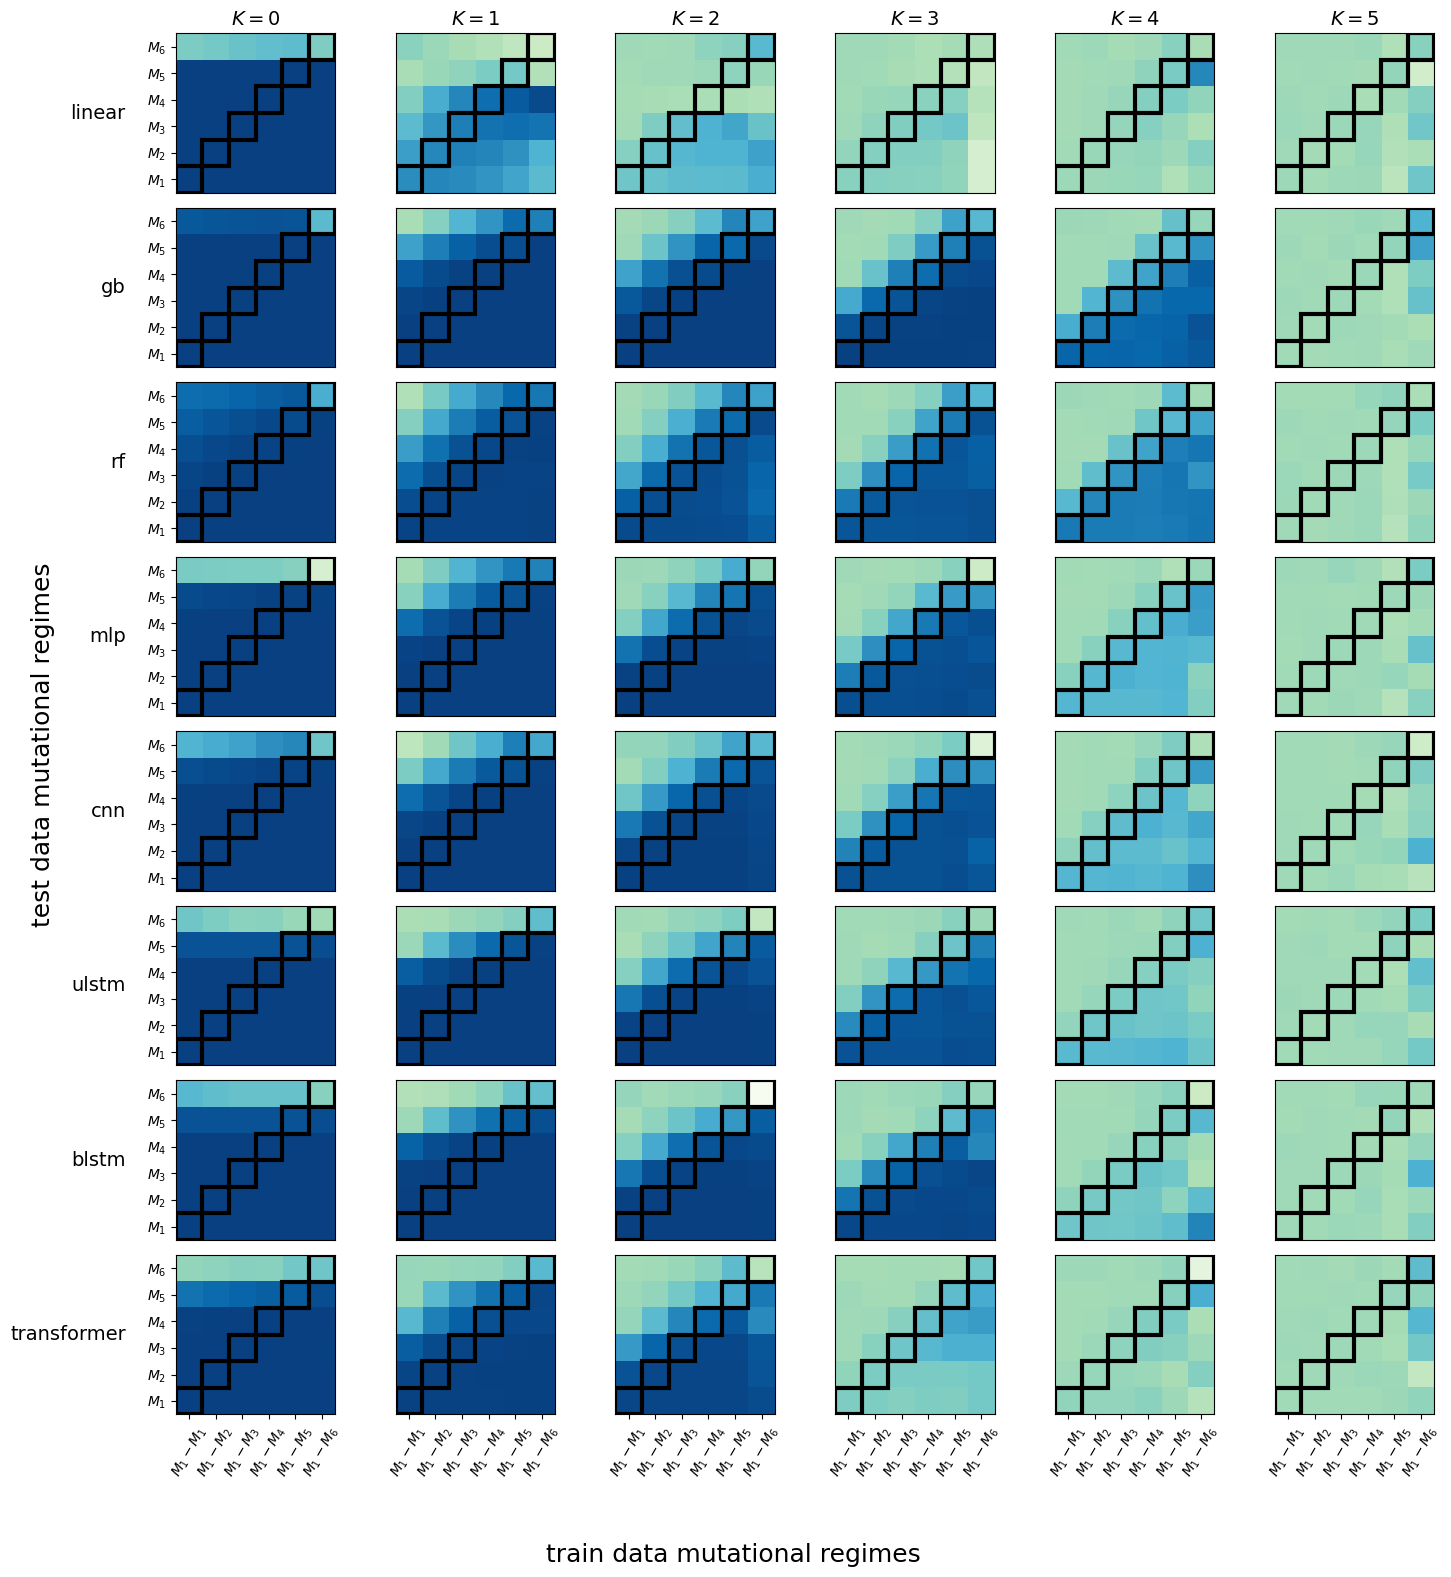

In [91]:
fig, ax = plt.subplots(nrows=8, ncols=6, figsize=(15, 15))

for i in range(pearson_means_NK.shape[0]):
    for j in range(pearson_means_NK.shape[1]): 
        data = np.flip(pearson_means_NK[i][j], axis=1)
        ax[i,j].imshow(data, 
                       cmap='GnBu',
                       vmin=np.nanmin(pearson_means_NK),
                       vmax=np.nanmax(pearson_means_NK))
        for k in range(6):   
            rect = Rectangle((5-k - 0.5, k - 0.5), 1, 1, 
                             edgecolor='black', 
                             facecolor='none', 
                             linewidth=3)
            ax[i,j].add_patch(rect)

column_labels = [r'$K=0$', 
                 r'$K=1$', 
                 r'$K=2$', 
                 r'$K=3$', 
                 r'$K=4$',
                 r'$K=5$' ]

for axis, col_label in zip(ax[0], column_labels):
    axis.set_title(col_label, 
                   fontsize=14)


row_labels = models
for axis, row_label in zip(ax[:, 0], row_labels):
    axis.set_ylabel(row_label, 
                    rotation=0, 
                    labelpad=15, 
                    fontsize=14, 
                    ha='right', 
                    va='center')

#do x-axis labels
x_ticks = [f'$M_1-M_{i+1}$' for i in range(6)]
for col_idx, axis in enumerate(ax[-1]):
    tick_labels = x_ticks
    axis.set_xticks(range(6))  # Set 6 tick positions
    axis.set_xticklabels(tick_labels, 
                         rotation=60, 
                         fontsize=10)

#do y-axis labels
y_ticks = [f'$M_{i+1}$' for i in range(6)]
for row_idx, axis in enumerate(ax[:,0]): 
    tick_labels = reversed(y_ticks)
    axis.set_yticks(range(6))
    axis.set_yticklabels(tick_labels, 
                         rotation=0, 
                         fontsize=10)

for ax_row in ax[:-1, 1:]:
    for axis in ax_row:
        axis.tick_params(left=False,
                         bottom=False,
                         labelleft=False,
                         labelbottom=False)

for ind, axis in enumerate(ax[-1]): 
    if ind>0: 
        axis.tick_params(left=False, 
                         labelleft=False)

for ind, axis in enumerate(ax[:,0]): 
    if ind<7: 
        axis.tick_params(bottom=False,
                         labelbottom=False)
    


fig.text(0.5, -0.04, 
         'train data mutational regimes', 
         ha='center',
         va='center', 
         fontsize=18)
fig.text(0.04, 0.5, 
         'test data mutational regimes', 
         ha='center', 
         va='center', 
         rotation='vertical', 
         fontsize=18)






#fig.axvline(x=0.5, color='k', linestyle='-', linewidth=2, transform=fig.transFigure)  # Vertical line in figure coords

fig.tight_layout()
#line = plt.Line2D([0,1],[y,y], transform=fig.transFigure, color="black")
#fig.add_artist(line)

#plt.savefig('../figures/extrapolation_NK.svg')
#plt.savefig('../figures/extrapolation_NK.png')

In [100]:
mat = pearson_means_NK[0][0]

In [101]:
mat

array([[0.148833  , 0.29554907, 0.28801382, 0.2440831 , 0.20385358,
        0.1603637 ],
       [0.99976783, 0.99971014, 0.99972499, 0.99970871, 0.99970577,
        0.9996851 ],
       [0.99994978, 0.99999114, 0.99999233, 0.99999147, 0.99999133,
        0.99999123],
       [0.99999826, 0.99999648, 0.99999632, 0.99999657, 0.99999644,
        0.99999666],
       [0.99999947, 0.99999957, 0.99999968, 0.99999967, 0.99999968,
        0.99999968],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]])

In [104]:
upper = np.triu(mat, k=1)

In [105]:
lower = np.tril(mat)

In [ ]:
np.mean(

In [114]:
pearson_means_NK[0][0]

array([[0.148833  , 0.29554907, 0.28801382, 0.2440831 , 0.20385358,
        0.1603637 ],
       [0.99976783, 0.99971014, 0.99972499, 0.99970871, 0.99970577,
        0.9996851 ],
       [0.99994978, 0.99999114, 0.99999233, 0.99999147, 0.99999133,
        0.99999123],
       [0.99999826, 0.99999648, 0.99999632, 0.99999657, 0.99999644,
        0.99999666],
       [0.99999947, 0.99999957, 0.99999968, 0.99999967, 0.99999968,
        0.99999968],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        ]])

In [116]:
extrpolation_indices = np.array([[extrapolation_index(k_val) for k_val in model] for model in pearson_means_NK])

In [123]:
extrpolation_indices_ns = np.array([[extrapolation_index_no_subtract(k_val) for k_val in model] for model in pearson_means_NK])

Text(0.5, 1.0, 'Extrapolation index versus NK landscape K value')

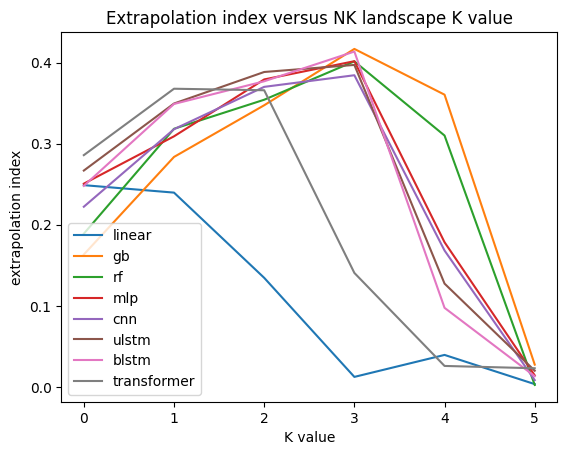

In [121]:
for model_ind, model in enumerate(models): 
    plt.plot(extrpolation_indices[model_ind], label = model)
plt.legend()
plt.xlabel('K value')
plt.ylabel('extrapolation index')
plt.title('Extrapolation index versus NK landscape K value')


Text(0.5, 1.0, 'Extrapolation index (no subtract) versus NK landscape K value')

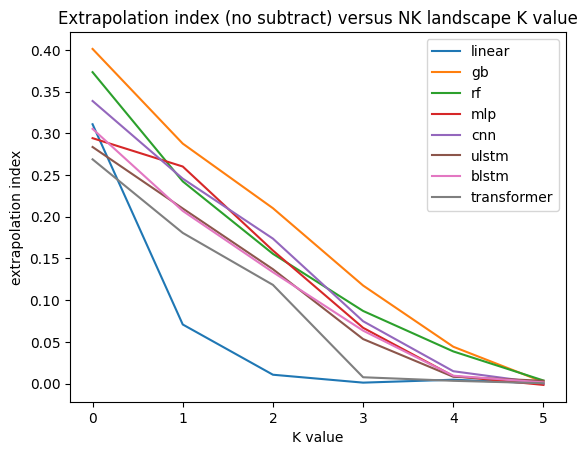

In [124]:
for model_ind, model in enumerate(models): 
    plt.plot(extrpolation_indices_ns[model_ind], label = model)
plt.legend()
plt.xlabel('K value')
plt.ylabel('extrapolation index')
plt.title('Extrapolation index (no subtract) versus NK landscape K value')

In [122]:
def extrapolation_index(matrix): 
    extrapolated = np.mean(np.triu(matrix, k=1))
    interpolated = np.mean(np.tril(matrix))

    extrapolation_ind = interpolated-extrapolated
    return extrapolation_ind


def extrapolation_index_no_subtract(matrix): 
    extrapolated = np.mean(np.triu(matrix, k=1))
    return extrapolated
    
    

## Ablation

In [3]:
#load data 
with open('../results/ablation_results_NK.pkl', 'rb') as file: 
    abl_results = pickle.load(file)

In [6]:
abl_pearson_results = np.zeros((8,6,4,5))

In [9]:
for model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(abl_results[model].keys()):         
        for repl_index, replicate in enumerate(abl_results[model][k_value].keys()): 
            for density_ind, density in enumerate(abl_results[model][k_value][replicate].keys()): 
                abl_pearson_results[model_index][k_index][repl_index][density_ind] = abl_results[model][k_value][replicate][density][0]['test']['pearson_r']
                

In [38]:
abl_prsn_res_means = np.mean(abl_pearson_results, axis=2)
abl_prsn_res_std   = np.std(abl_pearson_results, axis=2)

In [32]:
abl_prsn_res_means.shape

(8, 6, 5)

NameError: name 'abl_prsn_res_means' is not defined

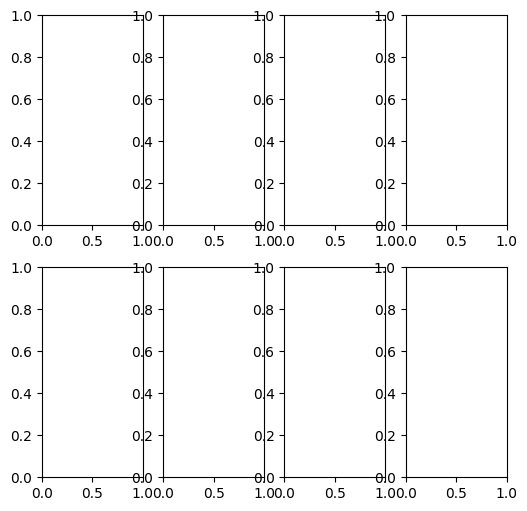

In [125]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize = (6, 6))



k=0
for i in range(abl_prsn_res_means.shape[0]):
    if i<4:
        j=0
    else: 
        j=1
    if i==4: 
        k=0    
    
    data = abl_prsn_res_means[i]
    #print(data.shape)
    ax[j,k].imshow(abl_prsn_res_means[i], 
                cmap='GnBu', 
                vmin=np.nanmin(abl_prsn_res_means), 
                vmax=np.nanmax(abl_prsn_res_means))
    ax[j,k].set_title(models[i])
    
    k+=1

#do x-axis labels
#do x-axis labels
x_ticks = [1.0, 0.8, 0.6, 0.4, 0.2]
for col_idx, axis in enumerate(ax.flatten()):
    tick_labels = x_ticks
    axis.set_xticks(range(5))  # Set 6 tick positions
    axis.set_xticklabels(tick_labels, 
                         rotation=60, 
                         fontsize=10)

y_ticks = range(6)
for row_idx, axis in enumerate(ax.flatten()): 
    tick_labels = reversed(y_ticks)
    axis.set_yticks(range(6))
    axis.set_yticklabels(tick_labels, 
                         rotation=0, 
                         fontsize=10)

fig.text(-0.04, 0.5, 
         'NK landscape $K$ value', 
         ha='center', 
         va='center', 
         rotation='vertical', 
         fontsize=14)

fig.text(0.5, -0.0, 
         'sampling density', 
         ha='center',
         va='center', 
         fontsize=14)

fig.tight_layout()

plt.savefig('../figures/ablation_NK.svg')
plt.savefig('../figures/ablation_NK.png')

## Interpolation

In [73]:
#load data 
with open('../results/interpolation_results_NK.pkl', 'rb') as file: 
    interp_results = pickle.load(file)

In [75]:
interp_pearson_res = np.zeros((8, 6, 4))

In [ ]:
or model_index, model in enumerate(models): 
    for k_index, k_value in enumerate(extrap_results[model].keys()):         
        for repl_index, replicate in enumerate(extrap_results[model][k_value].keys()):
            
            

# Extrapolation, ablation on NK landscapes
## Extrapolation

In [2]:
#load data 
with open('../results/extrapolation_results_NK.pkl', 'rb') as file: 
    extrap_results = pickle.load(file)